In [1]:
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates
%matplotlib inline

### 1. Data Understanding & Preparation

The dataset captures weather by minute from January 1st, 2013 to August 16th, 2013. 

There are 326958 data points with 11 features ranging from air pressure, temperation, wind information to humidity and rain stats

In [2]:
df = pd.read_csv('../input/weathercsv/weather.csv')
df

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,1/1/2013 0:07,921.8,42.08,74.0,1.4,85.0,1.7,64.0,1.1,0.0,0,45.6
1,1/1/2013 0:08,921.8,42.08,73.0,1.5,92.0,1.9,62.0,1.2,0.0,0,46.0
2,1/1/2013 0:09,921.8,42.08,73.0,1.7,85.0,2.0,67.0,1.2,0.0,0,45.3
3,1/1/2013 0:10,921.8,41.90,77.0,1.7,85.0,2.2,69.0,1.4,0.0,0,45.0
4,1/1/2013 0:11,921.9,41.90,74.0,1.8,83.0,2.0,59.0,1.4,0.0,0,44.1
...,...,...,...,...,...,...,...,...,...,...,...,...
326953,8/16/2013 4:48,916.6,78.62,195.0,1.0,196.0,1.1,194.0,0.9,0.0,0,9.1
326954,8/16/2013 4:49,916.6,78.62,192.0,0.9,193.0,0.9,192.0,0.8,0.0,0,8.8
326955,8/16/2013 4:50,916.6,78.62,186.0,0.7,186.0,0.8,186.0,0.6,0.0,0,8.6
326956,8/16/2013 4:51,916.6,78.62,176.0,0.6,178.0,0.7,175.0,0.5,0.0,0,7.1


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
air_pressure,326958.0,916.907851,3.162835,905.30,914.8,916.80,919.0,927.80
air_temp,326958.0,60.020897,11.921127,31.64,50.9,60.62,68.9,99.50
avg_wind_direction,326938.0,162.635338,94.458314,0.00,64.0,182.00,216.0,359.00
avg_wind_speed,326938.0,2.647411,1.908796,0.00,1.2,2.20,3.6,18.80
max_wind_direction,326938.0,164.156797,91.486737,0.00,69.0,187.00,222.0,359.00
max_wind_speed,326938.0,3.250007,2.229236,0.10,1.6,2.70,4.4,20.80
min_wind_direction,326938.0,167.643351,96.544423,0.00,86.0,179.00,212.0,359.00
min_wind_speed,326938.0,2.027310,1.631231,0.00,0.8,1.60,2.8,17.50
rain_accumulation,326958.0,0.000408,0.090374,0.00,0.0,0.00,0.0,51.59
rain_duration,326958.0,0.594171,61.190169,0.00,0.0,0.00,0.0,34871.00


#### 1.1. Remove NULL values

In [4]:
df.isnull().sum()

hpwren_timestamp       0
air_pressure           0
air_temp               0
avg_wind_direction    20
avg_wind_speed        20
max_wind_direction    20
max_wind_speed        20
min_wind_direction    20
min_wind_speed        20
rain_accumulation      0
rain_duration          0
relative_humidity      0
dtype: int64

In [5]:
# drop 20 records with null values
df = df.dropna()
df

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,1/1/2013 0:07,921.8,42.08,74.0,1.4,85.0,1.7,64.0,1.1,0.0,0,45.6
1,1/1/2013 0:08,921.8,42.08,73.0,1.5,92.0,1.9,62.0,1.2,0.0,0,46.0
2,1/1/2013 0:09,921.8,42.08,73.0,1.7,85.0,2.0,67.0,1.2,0.0,0,45.3
3,1/1/2013 0:10,921.8,41.90,77.0,1.7,85.0,2.2,69.0,1.4,0.0,0,45.0
4,1/1/2013 0:11,921.9,41.90,74.0,1.8,83.0,2.0,59.0,1.4,0.0,0,44.1
...,...,...,...,...,...,...,...,...,...,...,...,...
326953,8/16/2013 4:48,916.6,78.62,195.0,1.0,196.0,1.1,194.0,0.9,0.0,0,9.1
326954,8/16/2013 4:49,916.6,78.62,192.0,0.9,193.0,0.9,192.0,0.8,0.0,0,8.8
326955,8/16/2013 4:50,916.6,78.62,186.0,0.7,186.0,0.8,186.0,0.6,0.0,0,8.6
326956,8/16/2013 4:51,916.6,78.62,176.0,0.6,178.0,0.7,175.0,0.5,0.0,0,7.1


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
air_pressure,326938.0,916.907942,3.162779,905.30,914.8,916.80,919.0,927.80
air_temp,326938.0,60.022096,11.920446,31.64,50.9,60.62,68.9,99.50
avg_wind_direction,326938.0,162.635338,94.458314,0.00,64.0,182.00,216.0,359.00
avg_wind_speed,326938.0,2.647411,1.908796,0.00,1.2,2.20,3.6,18.80
max_wind_direction,326938.0,164.156797,91.486737,0.00,69.0,187.00,222.0,359.00
max_wind_speed,326938.0,3.250007,2.229236,0.10,1.6,2.70,4.4,20.80
min_wind_direction,326938.0,167.643351,96.544423,0.00,86.0,179.00,212.0,359.00
min_wind_speed,326938.0,2.027310,1.631231,0.00,0.8,1.60,2.8,17.50
rain_accumulation,326938.0,0.000408,0.090377,0.00,0.0,0.00,0.0,51.59
rain_duration,326938.0,0.593840,61.191864,0.00,0.0,0.00,0.0,34871.00


#### 1.2. Group data by hours to reduce the number of records

In [7]:
# Group by Hours
df.index = pd.to_datetime(df.hpwren_timestamp)
df.head()

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
hpwren_timestamp,,,,,,,,,,,,
2013-01-01 00:07:00,1/1/2013 0:07,921.8,42.08,74.0,1.4,85.0,1.7,64.0,1.1,0.0,0,45.6
2013-01-01 00:08:00,1/1/2013 0:08,921.8,42.08,73.0,1.5,92.0,1.9,62.0,1.2,0.0,0,46.0
2013-01-01 00:09:00,1/1/2013 0:09,921.8,42.08,73.0,1.7,85.0,2.0,67.0,1.2,0.0,0,45.3
2013-01-01 00:10:00,1/1/2013 0:10,921.8,41.90,77.0,1.7,85.0,2.2,69.0,1.4,0.0,0,45.0
2013-01-01 00:11:00,1/1/2013 0:11,921.9,41.90,74.0,1.8,83.0,2.0,59.0,1.4,0.0,0,44.1


In [8]:
hourly_df = df.groupby(by=[df.index.year, df.index.month, df.index.day, df.index.hour]).mean()

In [9]:
hourly_df.reset_index(drop=True)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,921.728302,41.950943,58.943396,1.837736,66.490566,2.105660,51.905660,1.584906,0.0,0.0,43.128302
1,921.326667,41.837000,44.000000,2.540000,51.000000,2.900000,36.600000,2.186667,0.0,0.0,45.398333
2,920.973333,41.807000,49.383333,3.301667,56.450000,3.743333,41.833333,2.816667,0.0,0.0,49.365000
3,920.513333,42.746000,69.266667,3.095000,76.583333,3.500000,61.433333,2.656667,0.0,0.0,46.040000
4,920.418333,43.487000,138.533333,1.693333,154.150000,2.180000,122.216667,1.216667,0.0,0.0,39.506667
...,...,...,...,...,...,...,...,...,...,...,...
5446,917.555000,77.984000,171.200000,1.608333,175.366667,1.785000,166.500000,1.423333,0.0,0.0,9.636667
5447,917.276667,78.251000,162.266667,1.135000,170.183333,1.280000,154.483333,0.991667,0.0,0.0,11.405000
5448,916.951667,77.591000,126.033333,0.345000,145.083333,0.471667,113.750000,0.228333,0.0,0.0,18.393333
5449,916.746667,78.242000,157.616667,0.813333,164.066667,0.906667,150.800000,0.725000,0.0,0.0,10.021667


In [10]:
print('Records with 0 rains')
print(hourly_df[hourly_df['rain_accumulation'] == 0].shape[0])
print(hourly_df[hourly_df['rain_duration'] == 0].shape[0])
print('Records with rains')
print(hourly_df[hourly_df['rain_accumulation'] != 0].shape[0])
print(hourly_df[hourly_df['rain_duration'] != 0].shape[0])
print('%Records with rains')
print(hourly_df[hourly_df['rain_accumulation'] != 0].shape[0]*100/hourly_df[hourly_df['rain_accumulation'] == 0].shape[0])
print(hourly_df[hourly_df['rain_duration'] != 0].shape[0]*100/hourly_df[hourly_df['rain_duration'] == 0].shape[0])

Records with 0 rains
5302
5252
Records with rains
149
199
%Records with rains
2.810260279139947
3.789032749428789


####  1.3 Remove rain features which have limited data 

In [11]:
features = ['air_pressure',
 'air_temp',
 'avg_wind_direction',
 'avg_wind_speed',
 'max_wind_direction',
 'max_wind_speed',
 'min_wind_direction',
 'min_wind_speed',
 'relative_humidity']

In [12]:
X = hourly_df[features]
X.reset_index(drop=True)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,921.728302,41.950943,58.943396,1.837736,66.490566,2.105660,51.905660,1.584906,43.128302
1,921.326667,41.837000,44.000000,2.540000,51.000000,2.900000,36.600000,2.186667,45.398333
2,920.973333,41.807000,49.383333,3.301667,56.450000,3.743333,41.833333,2.816667,49.365000
3,920.513333,42.746000,69.266667,3.095000,76.583333,3.500000,61.433333,2.656667,46.040000
4,920.418333,43.487000,138.533333,1.693333,154.150000,2.180000,122.216667,1.216667,39.506667
...,...,...,...,...,...,...,...,...,...
5446,917.555000,77.984000,171.200000,1.608333,175.366667,1.785000,166.500000,1.423333,9.636667
5447,917.276667,78.251000,162.266667,1.135000,170.183333,1.280000,154.483333,0.991667,11.405000
5448,916.951667,77.591000,126.033333,0.345000,145.083333,0.471667,113.750000,0.228333,18.393333
5449,916.746667,78.242000,157.616667,0.813333,164.066667,0.906667,150.800000,0.725000,10.021667


In [13]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.52497937, -1.51864286, -1.3870506 , ..., -1.61505232,
        -0.31452289, -0.27933287],
       [ 1.39791565, -1.52821933, -1.58694348, ..., -1.82863655,
         0.1131442 , -0.1877416 ],
       [ 1.28613301, -1.53074071, -1.51493241, ..., -1.75560753,
         0.56088053, -0.02769447],
       ...,
       [ 0.01381454,  1.47675673, -0.48961063, ..., -0.75203986,
        -1.27862879, -1.27733979],
       [-0.05104048,  1.53147059, -0.06713079, ..., -0.23502227,
        -0.92565147, -1.61511993],
       [-0.07833948,  1.56580888,  0.37866988, ...,  0.29698993,
        -0.87905417, -1.68823993]])

### 2. Identify optimal number of clusters k

The **Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b-a) / max(b-a) => Higher score is better

The **Calinski Harabasz Score or Variance Ratio** is the ratio between within-cluster dispersion and between-cluster dispersion => Higher score is better


In [14]:
K = [i for i in range(3,15)]
silhouette_scores = []
calinski_harabasz_scores = []
sum_of_squared_distances = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(X)
    labels = model.labels_
    silhouette_scores.append(metrics.silhouette_score(X, labels, metric = 'euclidean'))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(X, labels))
    sum_of_squared_distances.append(model.inertia_)

In [15]:
scores = pd.DataFrame([K, silhouette_scores, 
                   calinski_harabasz_scores, sum_of_squared_distances]).transpose()
scores = scores.rename(columns={0: 'K', 1: 'silhouette_scores', 2:'calinski_harabasz_scores', 3:'sum_of_squared_distances'})
scores

,K,silhouette_scores,calinski_harabasz_scores,sum_of_squared_distances
0,3.0,0.241487,1781.500001,29660.920236
1,4.0,0.243695,1818.948618,24507.471306
2,5.0,0.243396,1793.261092,21172.398641
3,6.0,0.243944,1693.307793,19201.796422
4,7.0,0.235610,1616.956327,17633.877947
5,8.0,0.229618,1523.561382,16577.478680
6,9.0,0.233678,1464.785750,15557.971915
7,10.0,0.227976,1404.587563,14762.004869
8,11.0,0.222783,1358.976268,14024.405271
9,12.0,0.217700,1311.704723,13430.435334


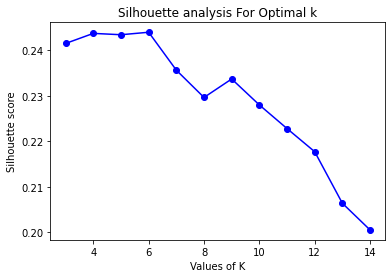

In [16]:
plt.plot(K,silhouette_scores,'bo-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

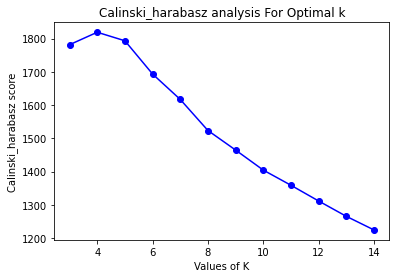

In [17]:
plt.plot(K,calinski_harabasz_scores,'bo-')
plt.xlabel('Values of K') 
plt.ylabel('Calinski_harabasz score') 
plt.title('Calinski_harabasz analysis For Optimal k')
plt.show()

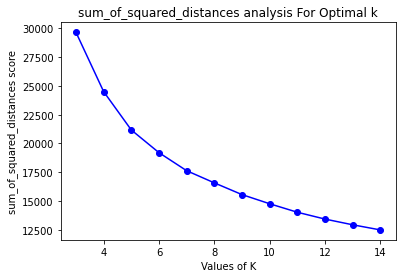

In [18]:
plt.plot(K,sum_of_squared_distances,'bo-')
plt.xlabel('Values of K') 
plt.ylabel('sum_of_squared_distances score') 
plt.title('sum_of_squared_distances analysis For Optimal k')
plt.show()

### 3. Clustering with optimal k = 4

In [19]:
# Choose K = 4
k = 4
kmeans = KMeans(n_clusters=k)
model = kmeans.fit(X)

#### 3.1. Analyze cluster centers

In [20]:
# identify cluster centers
centers = model.cluster_centers_
def identify_cluster_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('label')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    cluster_centers = pd.DataFrame(Z, columns=colNames)
    cluster_centers['label'] = cluster_centers['label'].astype(int)
    return cluster_centers

cluster_centers = identify_cluster_centers(features, centers)
cluster_centers

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity,label
0,0.267307,0.159408,-1.183812,-0.575064,-1.161787,-0.578150,-0.798837,-0.548140,-0.324504,0
1,-0.623964,-0.418029,0.499856,0.983103,0.652345,0.927252,0.280661,1.031716,0.702275,1
2,-0.008619,0.208416,0.643086,-0.512177,0.526744,-0.493275,0.570756,-0.530181,-0.013537,2
3,1.282706,-0.426856,-1.466752,1.886417,-1.352688,1.976616,-1.656371,1.727820,-1.208480,3


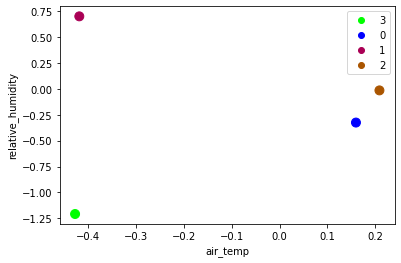

In [21]:
feature1 = 'air_temp'
feature2 = 'relative_humidity'
x = cluster_centers[feature1]
y = cluster_centers[feature2]
label = cluster_centers.label
clset = set(zip(label, label))

ax = plt.gca()
sc = ax.scatter(x, y, c=label, cmap="brg", s = 80)

handles = [plt.plot([],color=sc.get_cmap()(sc.norm(c)),ls="", marker="o")[0] for c,l in clset ]
labels = [l for c, l in clset]
ax.legend(handles, labels)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

In [22]:
# Parallel Plots
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    #parallel_coordinates(data, 'prediction',  marker='o')
    parallel_coordinates(data, 'label', color = my_colors, marker='o')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title('Cluster Centers')

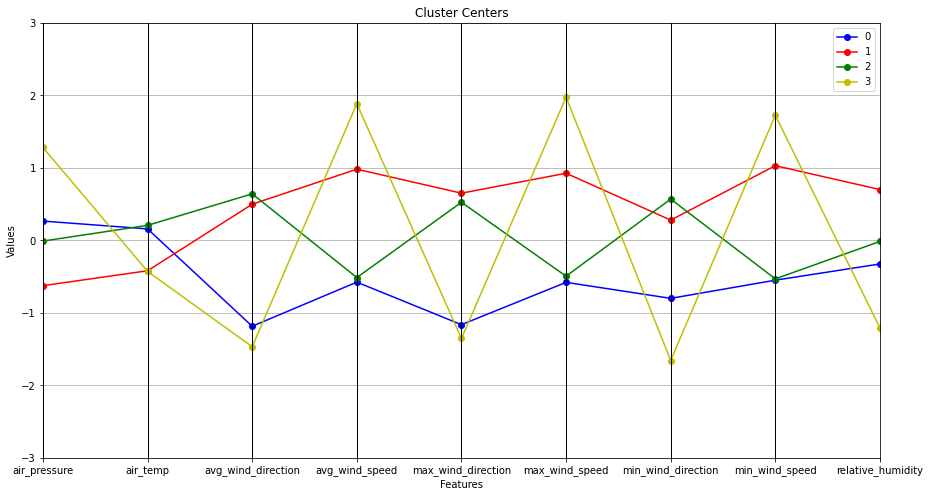

In [23]:
parallel_plot(cluster_centers)

In [24]:
# update dataframe with label
hourly_df['label'] = model.labels_
hourly_df.reset_index(drop = True)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,label
0,921.728302,41.950943,58.943396,1.837736,66.490566,2.105660,51.905660,1.584906,0.0,0.0,43.128302,0
1,921.326667,41.837000,44.000000,2.540000,51.000000,2.900000,36.600000,2.186667,0.0,0.0,45.398333,0
2,920.973333,41.807000,49.383333,3.301667,56.450000,3.743333,41.833333,2.816667,0.0,0.0,49.365000,0
3,920.513333,42.746000,69.266667,3.095000,76.583333,3.500000,61.433333,2.656667,0.0,0.0,46.040000,0
4,920.418333,43.487000,138.533333,1.693333,154.150000,2.180000,122.216667,1.216667,0.0,0.0,39.506667,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5446,917.555000,77.984000,171.200000,1.608333,175.366667,1.785000,166.500000,1.423333,0.0,0.0,9.636667,2
5447,917.276667,78.251000,162.266667,1.135000,170.183333,1.280000,154.483333,0.991667,0.0,0.0,11.405000,2
5448,916.951667,77.591000,126.033333,0.345000,145.083333,0.471667,113.750000,0.228333,0.0,0.0,18.393333,0
5449,916.746667,78.242000,157.616667,0.813333,164.066667,0.906667,150.800000,0.725000,0.0,0.0,10.021667,2


In [25]:
hourly_df.groupby('label').mean()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
label,,,,,,,,,,,
0,917.755194,61.929721,74.084953,1.656930,80.897326,2.069424,110.363820,1.257399,0.000829,1.026626,41.964551
1,914.926845,55.070926,199.941172,4.346988,210.812929,5.150720,187.715212,3.481650,0.000679,0.958158,67.429860
2,916.884782,62.473679,210.707272,1.764045,201.911495,2.241261,208.518325,1.281700,0.000080,0.229306,49.756156
3,920.960535,54.912770,52.936612,5.910075,67.209538,7.303450,48.821390,4.464112,0.000002,0.032706,20.119711


In [26]:
records_by_label = pd.DataFrame(hourly_df.groupby('label').count()['air_pressure'])
records_by_label = records_by_label.rename(columns = {'air_pressure':'Records'})
records_by_label['% Records'] = records_by_label['Records']*100/records_by_label['Records'].sum()
records_by_label

,Records,% Records
label,,
0,1384,25.389837
1,1325,24.307467
2,2370,43.478261
3,372,6.824436


### Evaluation and Observation
> Cluster 0 has highest humidity and lowest air_temp, with highest rain_accumulation and  rain_duration =>  featuring rainy weather

> Cluster 1 and 3 has highest air temp and lowest wind speed, with oposite wind direction => featuring warm weather

> Cluster 2 has lowest air temp, lowest humidity and highest wind speed => featuring cold weather

> Warm Weather (Cluster 1) is dominant in the dataset, while cold weather (Cluster 2) is not frequent

### Reference
https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca